**Question 1:** 
Overflow boundary
Find the largest double

In [1]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Python uses double percision and it tells us its 1.7976931348623157e+308. Which is about what we would get from the exponent 2^1023 ~= 10^308

**Question 2:** Approximate machine precision
Perform the following computer experiment to determine εm: Consider the sum
ΣM = 1+2
−M. (1.32)
Compute numerically ΣM for M = 0,1,...,M∗
, where M∗
is defined by ΣM∗ = 1. The value of
2
−M∗
defines εm.

In [2]:
i = 40 #starting kinda close so it doesnt take forever and use up all of google servers resources
x= 1.0 #had to create some float cus it just kept getting bigger if i didnt
while float(1 + x) > float(1):
  x = float(2**(-i))
  #print(i, x)
  i+=1
print(2**-(i-1))

1.1102230246251565e-16


neat, that agrees with half the value of epsilon in the first block

**Question 3:** Truncation error
Perform the following computer experiment. Define the cosine function by a truncated Taylor series
cosM(x) =
M
∑
n=0
(−1)
n
x
2n
(2n)!
. (1.33)
1. Plot and compare cos and cosM for M = 1,2,...,10.
2. It is not straightforward to ensure definite accuracy for cos(x). What is easy to do is to
assume that the error in the summation is approximately the last term summed (this assumes
no round-off error!). To obtain an absolute error of 1 part in 107
, we then stop the calculation
when the ratio of the last term kept in the series, M-th term, over the accumulated sum of
all the terms is less than predefined precision (e.g. 10−7
). In general, one can pick any
desired tolerance level; however if it is too close to, or smaller than, machine precision, the
calculation may not be able to attain it.
Write an algorithm computing cos(x) with the precision of 10−7
.
3. A naive implementation of the algorithm for the previous problem would calculate (−1)
n
x
2n
and then divide it by (2n)!. This is not the best way to compute. On the one hand, both (2n)!
and x
2n
can get very large and cause overflows, even though their quotient may not. On the
other hand, powers and factorials are very expensive (time-consuming) to evaluate on the
computer. Consequently, a better approach is to use a single multiplication to relate the next
term in the series to the previous one:
(−1)
n
x
2n
(2n)!
=

−x
2
2n(2n−1)

×
(−1)
n−1
x
2(n−1)
(2(n−1))!
 fn =

−x
2
2n(2n−1)

× fn−1
with f0 = 1.
Modify your algorithm accordingly.
4. Without using the periodicity property of cos, compute cos(x) using the developed algorithm
and show that it converges but to a wrong value (compare the result with the built-in cos).
5. Show that for very large x the algorithm does not converge after 200 iterations.
6. Now make use of the identity cos(x+2kπ) = cos x to compute cos x for large x values where
the series otherwise would diverge. Recompute previous two steps.


<function matplotlib.pyplot.show>

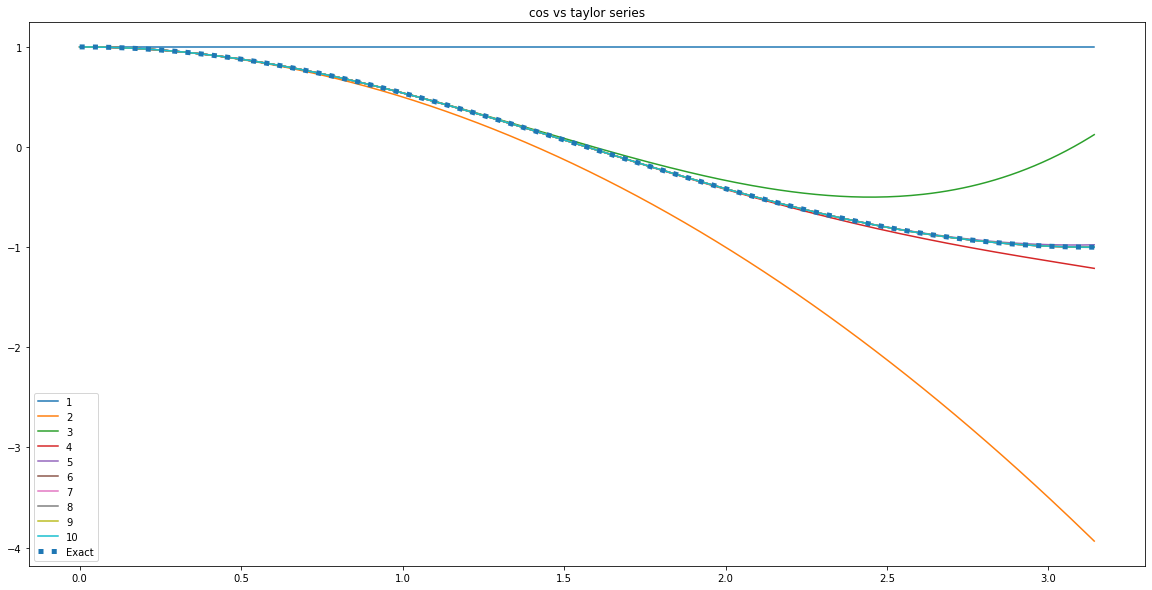

In [3]:
import sympy as sp
import math
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

def cosm(x,m):
  r = 0
  for n in range(0,m):
    #print(n, ((-1)**n * (x)**(2*n) / math.factorial(2*n)))
    r += ((-1)**n * (x)**(2*n) / math.factorial(2*n))
  return r
X = np.linspace(0, math.pi, 256)

plt.figure(figsize=(20,10))
for n in range(1,11):
  plt.plot(X, cosm(X,n), label = n)

plt.title('cos vs taylor series')
plt.plot(X, np.cos(X), linewidth = 5, linestyle = ':')
plt.legend([1,2,3,4,5,6,7,8,9,10,"Exact"])
plt.show


In [4]:
#error checking version of the algorithm
import math
from matplotlib import pyplot as plt

%matplotlib inline

err = 1E-10

def cosm(x):
  r = [1.0]
  n=2
  while abs(r[-1]) > err:
    a = (-1)**n * (x)**(2*n) / math.factorial(2*n)
    r.append(a)
    n+=1
  return sum(r)

print(cosm(.2))
print(math.cos(.2))
 


1.0000665778412698
0.9800665778412416


In [5]:
#faster version
import math
from matplotlib import pyplot as plt

%matplotlib inline

err = 1E-10 #set error bounds

def cosm(x):
  r = [1.0]
  n=2
  while abs(r[-1]) > err:
    a = - x**2 * r[-1] /(2*n*(2*n-1))
    r.append(a)
    n+=1
  return sum(r)

print(cosm(.3))
print(math.cos(.3))
 


0.9925224638754465
0.955336489125606


-5.551115123125783e-17


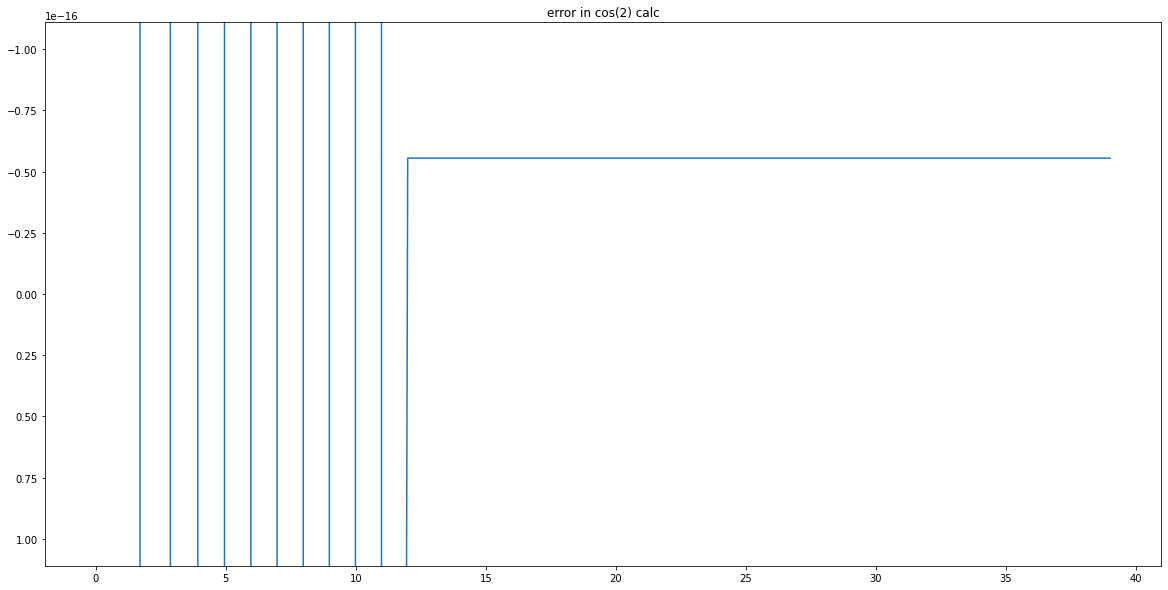

In [6]:
#Showing incorrect convergence
import sympy as sp
import math
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

def cosm(x,m):
  r = 0
  for n in range(0,m):
    r += ((-1)**n * (x)**(2*n) / math.factorial(2*n))
  return r
  
err = []
for x in range(0,40):
  err.append( cosm(2,x) - math.cos(2))

print (err[-1])
plt.figure(figsize=(20,10))
plt.ylim(-err[-1] *2,err[-1] *2)
plt.title("error in cos(2) calc")
plt.plot(err)



convergence in the error is close here but it levels off not at zero



<function matplotlib.pyplot.show>

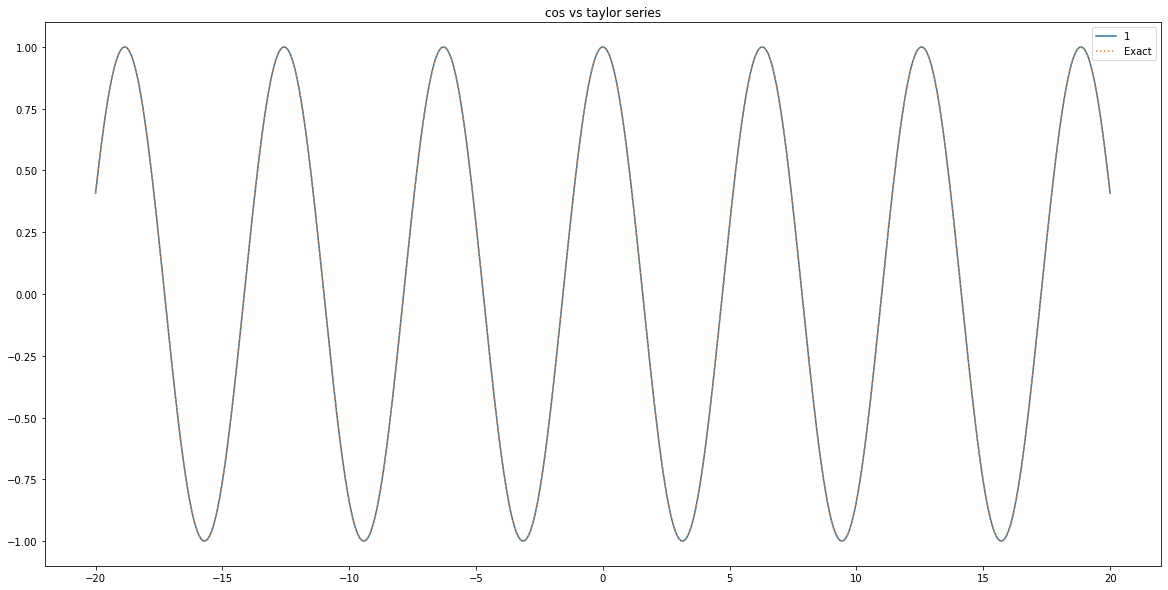

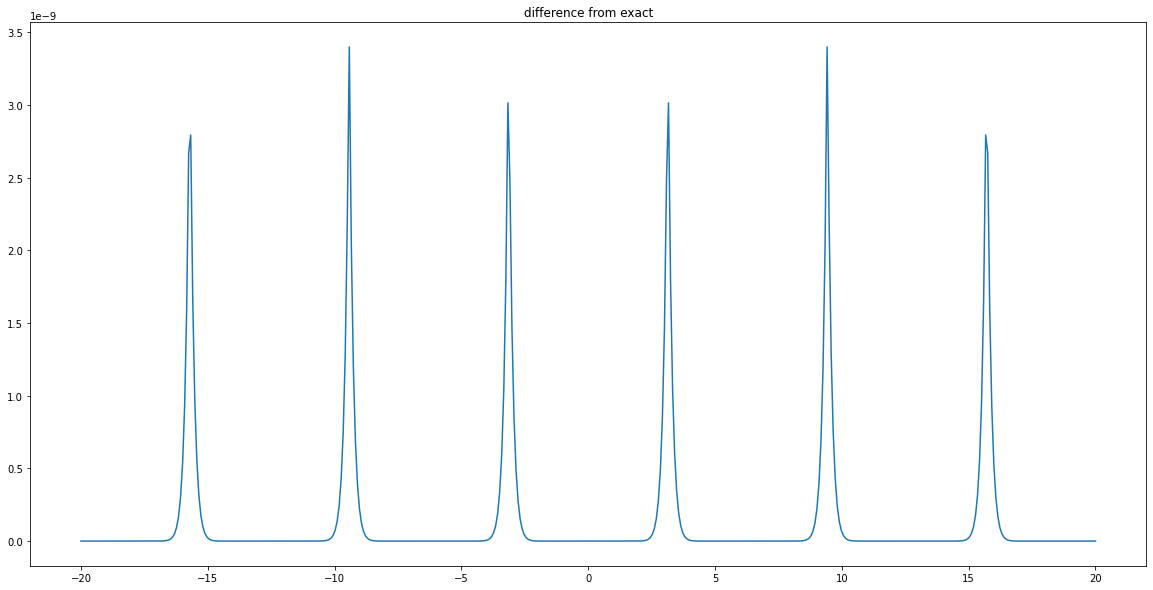

In [7]:
import sympy as sp
import math
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

def cosm(x,m):
  while x > math.pi:
    x -= 2*math.pi
  while x < -math.pi:
    x += 2*math.pi
  while x < 0:
    x = abs(x) 
  r = [1]
  for n in range(1,m):
    a = - x**2 * r[-1] /(2*n*(2*n-1))
    r.append(a)
    n+=1
  return sum(r)

#getting some stuff ready to make a graph
vcosm = np.vectorize(cosm)
graph = []
X = np.linspace(-20, 20, 500)

plt.figure(figsize=(20,10))
plt.plot(X,vcosm(X,10))
plt.plot(X,np.cos(X), linestyle=':')
plt.title('cos vs taylor series')
plt.legend([1,"Exact"])
plt.show

plt.figure(figsize=(20,10))
plt.plot(X,abs(vcosm(X,10) - np.cos(X)))
plt.title('difference from exact')
plt.show


**Question 4:** 
1. uh, the equation on the next line. $f' = \frac{f(x+h) - f(x)}{h}$
2. $ \epsilon_t = f' - \frac{f(x+h) - f(x)}{h}$ <br>
  expanding f(x+h) <br>
  $ \epsilon_t = f' - \frac{f(x) + h*f'(x) + ... - f(x)}{h}$ <br>
  $ \epsilon_t = h*f''(x) + h^2 f'''(x) + O(h^3)$ <br>
  so our error is first order in h, but it also depends on the size of $f''$ so a line would have zero error.
3. this time we expand and get <br>
  $ \epsilon_t = f' - \frac{(f(x) + h f'(x) + \frac{1}{2}f''(x)h + \frac{1}{6}f'''(x)h^2 + ...)  - (f(x) - h f'(x) + \frac{1}{2}f''(x)h + \frac{1}{6}f'''(x)h^2 + ...)}{2h}$ <br>
  which leaves <br>
$\epsilon_t = \frac{1}{6}f'''(x)h^2 + O(h^4)$ <br>
so this time we can do parabolas with out error
4. $ \Delta f'(x) = \frac{f(x+h) + \epsilon_{x+h}f(x+h) - f(x-h) + \epsilon_{x-h} f(x-h)}{2h} -  \frac{f(x+h) - f(x-h)}{2h}  $ <br>
which gives a maximum error of $ \frac{\epsilon}{h} f(x) $
5. done above
6. $\epsilon_r + \epsilon_t = \frac{1}{6}|f'''(x)| h^2 + \epsilon_m \frac{f(x)}{h} $ <br>
taking the derivative <br>
$ 0 = h \frac{1}{3} |f'''(x)| - \epsilon_m |\frac{f(x)}{f'''(x)}|$ <br>
$h \propto \epsilon_m^\frac{1}{3} $ <br>
then to leading order, <br>
$\epsilon_r + \epsilon_t \propto \epsilon ^\frac{2}{3}$


**Question 5:**

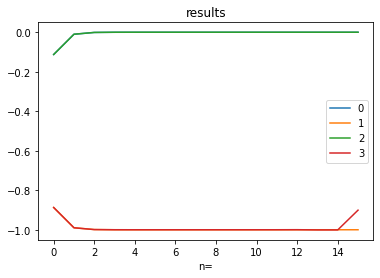

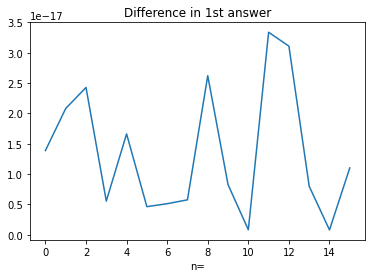

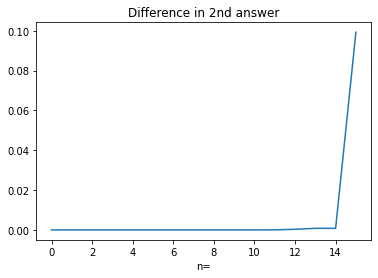

In [8]:
import matplotlib.pyplot as plt
import math
import numpy as np
def quad1(a):
  r = np.zeros(shape=(a-1,4))
  for n in range(1,a):
   r[:][n-1] = [(-1 + math.sqrt(1 - 4*10**(-n))) /(2), (-1 - math.sqrt(1 - 4*10**(-n)))/2, -2*10**(-n)/(1+math.sqrt(1-4*10**(-n))), -2*10**(-n)/(1-math.sqrt(1-4*10**(-n)))]
  return r

stuff = quad1(17)

plt.plot(stuff[:,0])
plt.plot(stuff[:,1])
plt.plot(stuff[:,2])
plt.plot(stuff[:,3])
plt.legend([0,1,2,3])
plt.title("results")
plt.xlabel("n=")
plt.show()

plt.plot(abs(stuff[:,0]-stuff[:,2]))
plt.xlabel("n=")
plt.title("Difference in 1st answer")
plt.show()

plt.plot(abs(stuff[:,1]-stuff[:,3]))
plt.xlabel("n=")
plt.title("Difference in 2nd answer")
plt.show()

It seems the 1st one is stable and the second is not. orange also seems stable but red doesnt.

In [9]:
#lets make a precise version, by picking the stable method and then adding some precision
import sympy as sp

def quadeq(num, whichroot):
  n = sp.N(10**(-num), num*10)
  if whichroot == 1:
    return sp.N( ((-1+sp.sqrt(1+4*10**(-n))) / 2), num*10)
  if whichroot == 2:
    return sp.N((- 2*10**(-n)/(1-sp.sqrt(1+4*10**(-n)))), num*10)

a = quadeq(9999,1)
b = quadeq(9999,2)

print(sp.N(a, 50)) #sp.N just to get it to format better
print(sp.N(b,50))

print( "Difference from the golden ratio in 1:", sp.N(a + sp.N( ((1 - sp.sqrt(5)) / 2), 999999)))  #sp.N just to get it to format in scientific notation
print( "Difference from the golden ratio in 2:", sp.N(b - sp.N( ((1 + sp.sqrt(5)) / 2), 999999)))

0.61803398874989484820458683436563811772030917980576
1.6180339887498948482045868343656381177203091798058
Difference from the golden ratio in 1: 2.80425379266210e-99992
Difference from the golden ratio in 2: 2.80425379266210e-99992


Hmm, that looks like the golden ratio





In [10]:
#if we are going to use one of the two we want to choose the one that is stable in our regime so
def quadeq(n, whichroot):
  if whichroot == 1:
    return sp.N( ((-1+sp.sqrt(1+4*10**(-n))) / 2))
  if whichroot == 2:
    return sp.N((- 2*10**(-n)/(1-sp.sqrt(1+4*10**(-n)))))

print(quadeq(10,2))


0.999999917259636


TO avoid subtractive cancelations we have to avoid subtracting numbers. Right? So we have to choose the solutions which do not involve minus signs. 

E.G. 


```
(-1 - math.sqrt(1 - 4*10**(-n)))/2  
and 
-2*10**(-n)/(1+math.sqrt(1-4*10**(-n))) 
```

